c:\Users\visin\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\visin\AppData\Local\Programs\Python\Python313\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
        "wmic CPU Get NumberOfCores /Format:csv".split(),
        capture_output=True,
        text=True,
    )
  File "c:\Users\visin\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 554, in run
    with Popen(*popenargs, **kwargs) as process:
         ~~~~~^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\visin\AppData\Local\Programs\Python\Python313\Lib\subprocess.py", line 1036

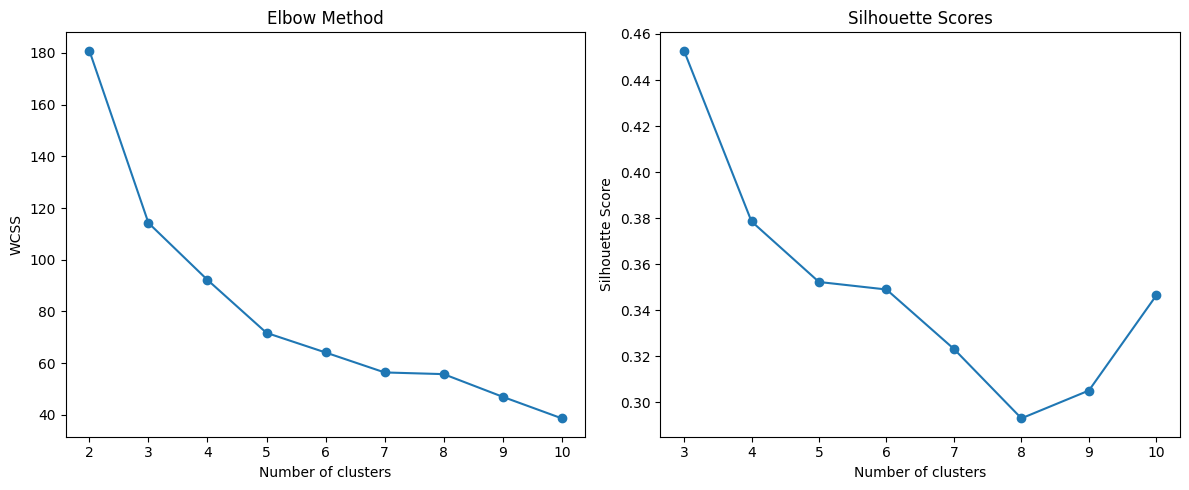

Confusion Matrix:
[[10  0  0]
 [ 0  7  2]
 [ 0  0 11]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.78      0.88         9
           2       0.85      1.00      0.92        11

    accuracy                           0.93        30
   macro avg       0.95      0.93      0.93        30
weighted avg       0.94      0.93      0.93        30



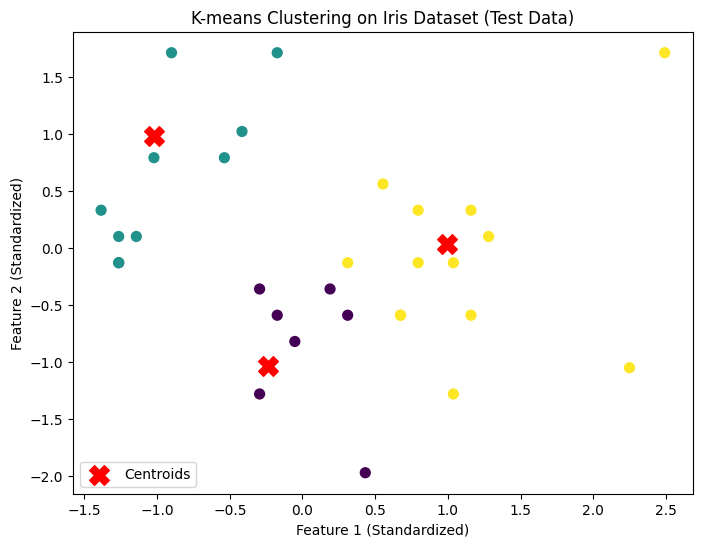


Cluster Centers (in original scale):
[[5.64594595 2.60810811 4.2        1.33783784]
 [5.0025641  3.48205128 1.45384615 0.24358974]
 [6.66136364 3.07045455 5.34318182 1.88636364]]


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split


iris = datasets.load_iris()
X = iris.data
y = iris.target


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

wcss = []
silhouette_scores = []
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_train)
    wcss.append(kmeans.inertia_)


    if k > 1:
        silhouette_scores.append(silhouette_score(X_train, kmeans.labels_))
    else:
        silhouette_scores.append(0)


plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(cluster_range, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')


plt.subplot(1, 2, 2)
plt.plot(cluster_range[1:], silhouette_scores[1:], marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


optimal_k = 3


kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(X_train)


test_clusters = kmeans.predict(X_test)


from sklearn.metrics import confusion_matrix, classification_report


from scipy.stats import mode


labels = np.zeros_like(test_clusters)
for i in range(optimal_k):
    mask = (test_clusters == i)
    labels[mask] = mode(y_test[mask])[0]


print("Confusion Matrix:")
print(confusion_matrix(y_test, labels))
print("\nClassification Report:")
print(classification_report(y_test, labels))


plt.figure(figsize=(8, 6))
plt.scatter(X_test[:, 0], X_test[:, 1], c=test_clusters, cmap='viridis', s=50)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-means Clustering on Iris Dataset (Test Data)')
plt.xlabel('Feature 1 (Standardized)')
plt.ylabel('Feature 2 (Standardized)')
plt.legend()
plt.show()


print("\nCluster Centers (in original scale):")
original_scale_centers = scaler.inverse_transform(kmeans.cluster_centers_)
print(original_scale_centers)